<a href="https://colab.research.google.com/github/SayaliVB/US_Accidents_Data_Analysis/blob/main/Sayali_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

#read data from csv to dataframe
df = pd.read_csv('/content/drive/MyDrive/Accidents_US.csv')

In [ ]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

# **Handle missing value using median**

In [ ]:
continuous_variables = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for var in continuous_variables:
    median_val = df[var].median()
    df[var].fillna(median_val, inplace=True)

df.dropna(inplace=True)

# **Create Delay column**

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

df['Elapsed_Time'] = df['End_Time'] - df['Start_Time']
df['Elapsed_Time'] = df['Elapsed_Time'].dt.total_seconds()/3600
df['Elapsed_Time'] = round(df['Elapsed_Time'], 2)
df[['Start_Time', 'End_Time', 'Elapsed_Time']].head()

,Start_Time,End_Time,Elapsed_Time
1,2022-12-03 23:37:14,2022-12-04 01:56:53,2.33
2,2022-08-20 13:13:00,2022-08-20 15:22:45,2.16
3,2022-02-21 17:43:04,2022-02-21 19:43:23,2.01
4,2020-12-04 01:46:00,2020-12-04 04:13:09,2.45
6,2020-01-14 16:49:23,2020-01-14 20:49:23,4.00


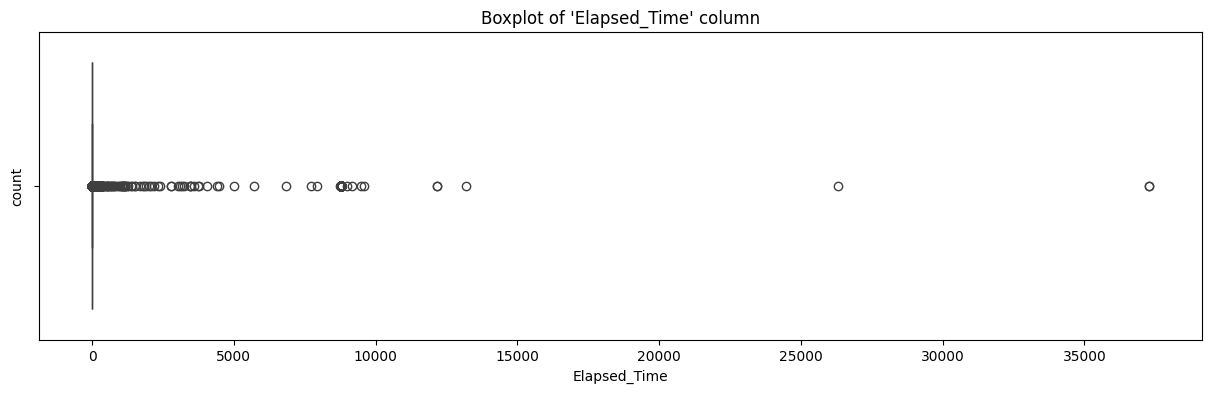

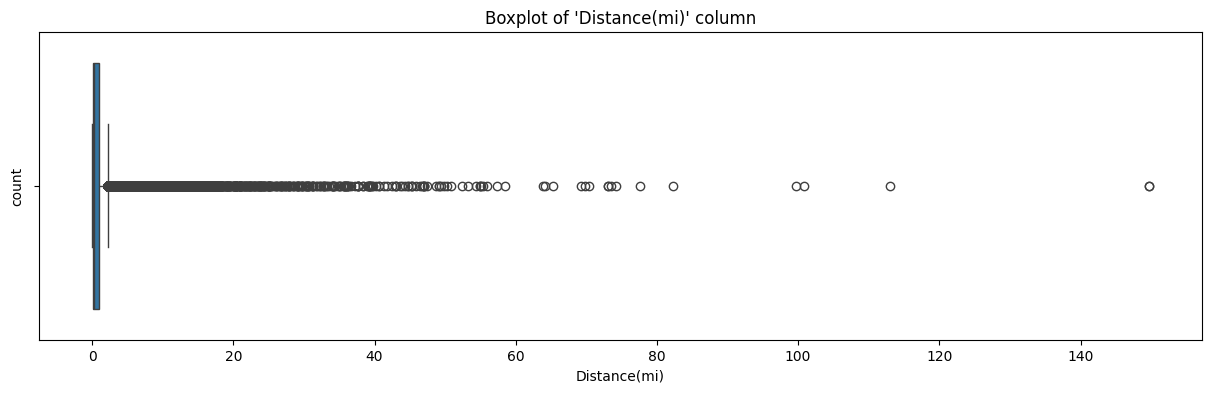

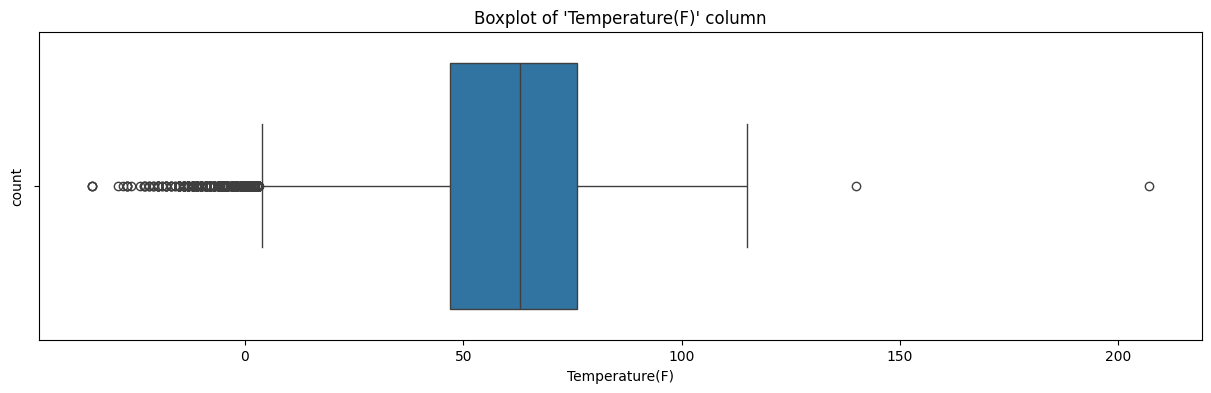

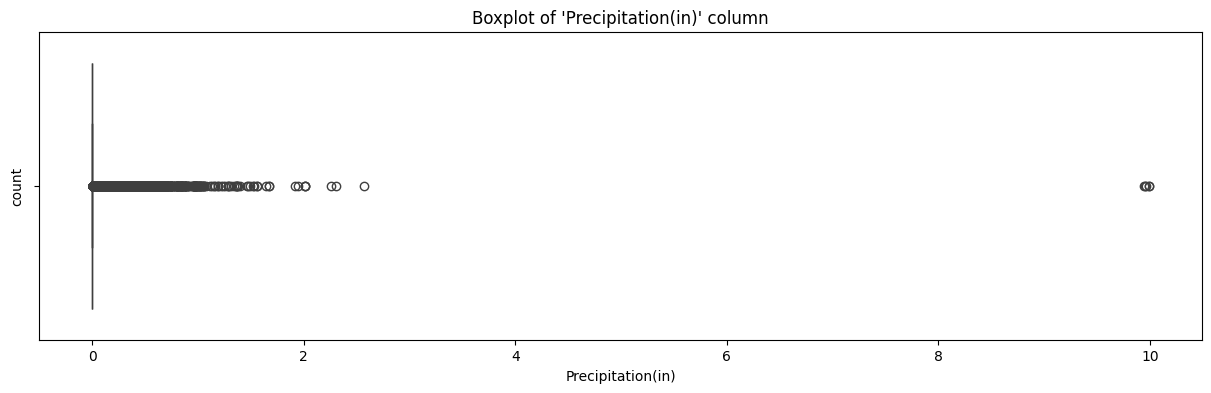

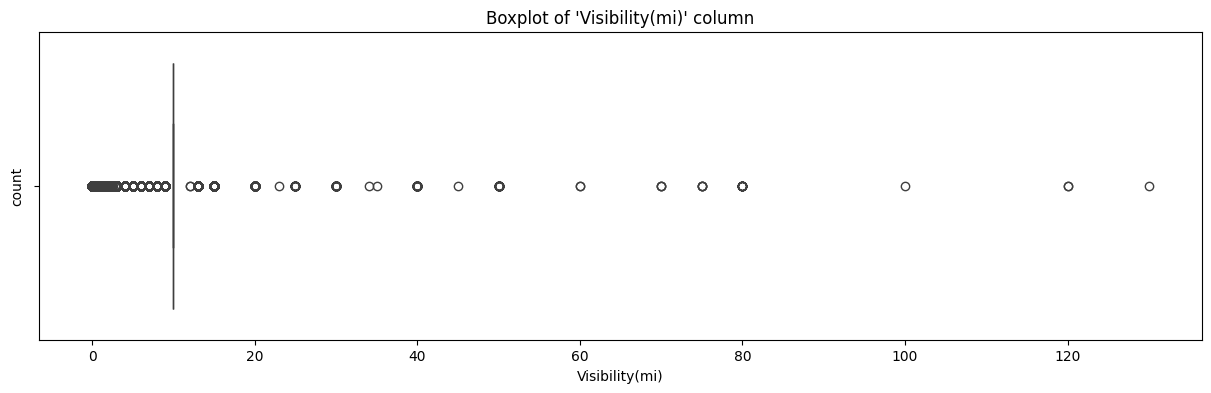

In [ ]:
columns_to_boxplot = ['Elapsed_Time', 'Distance(mi)', 'Temperature(F)', 'Precipitation(in)', 'Visibility(mi)']

def box_plot(df):
  for column in columns_to_boxplot:
    #calculate IQR, upper_limit and lower_limit
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    min_value = df[column].min()
    if lower_limit< min_value:
      lower_limit= min_value
    upper_limit = Q3 + 1.5 * IQR
    max_value = df[column].max()
    if upper_limit> max_value:
      upper_limit = max_value
  for col in columns_to_boxplot:
    plot.figure(figsize = (15, 4))
    plot.ylabel('count')
    sb.boxplot(x=df[col])
    plot.title("Boxplot of '{}' column".format(col))
    plot.show()

box_plot(df)

# **Remove Outliers**

In [ ]:
extreme_value_index = []
extreme_value_index.extend(df['Distance(mi)'].nlargest(20).index.tolist())
extreme_value_index.extend(df['Precipitation(in)'].nlargest(20).index.tolist())
extreme_value_index.extend(df['Temperature(F)'].nlargest(10).index.tolist())
extreme_value_index.extend(df['Visibility(mi)'].nlargest(4).index.tolist())
#extreme_value_index.extend(df['Elapsed_Time'].nlargest(4).index.tolist())

#extreme_value_index.extend(df[df['Temperature(F)'] == df['Temperature(F)'].min()].index)

#drop the row with the extreme value
df_updated = df.drop(extreme_value_index)
df_updated.head()
df_updated = df_updated[df_updated['Elapsed_Time'] <= 20]

print(df_updated.shape[0])

240311


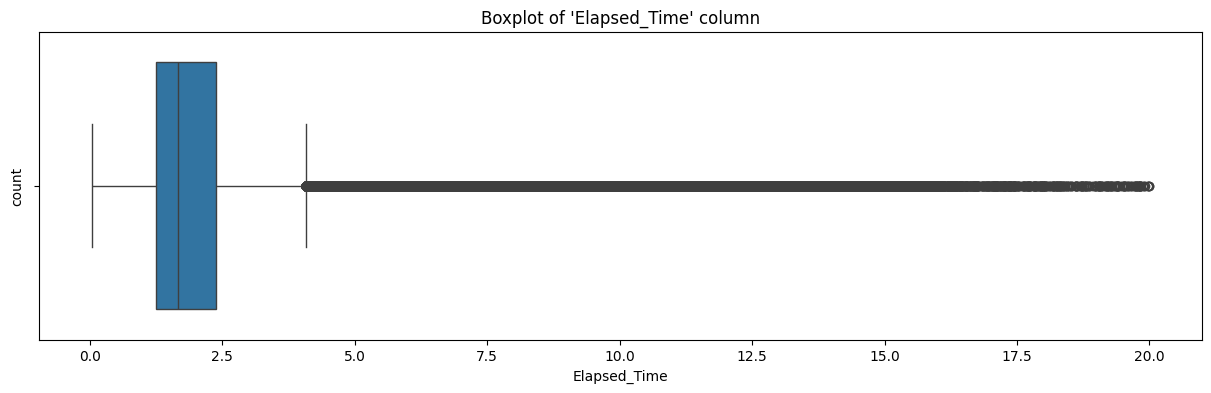

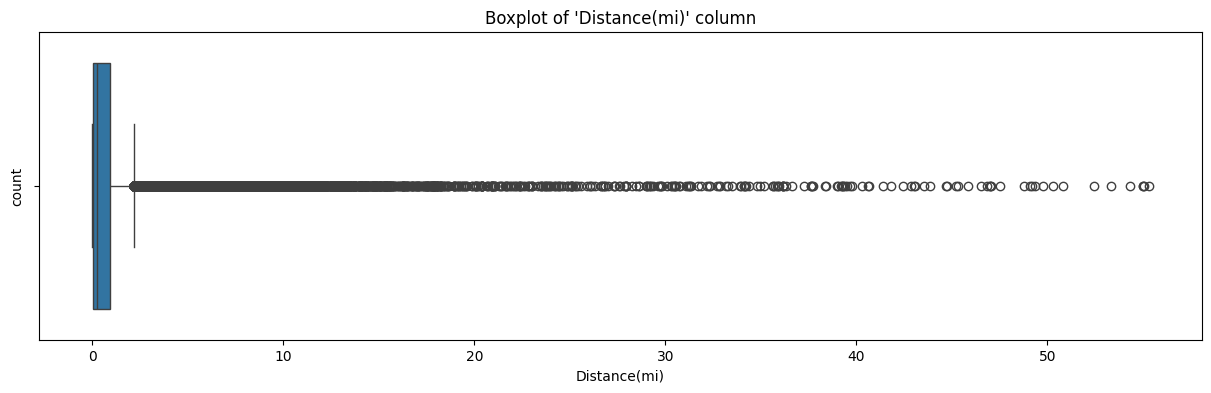

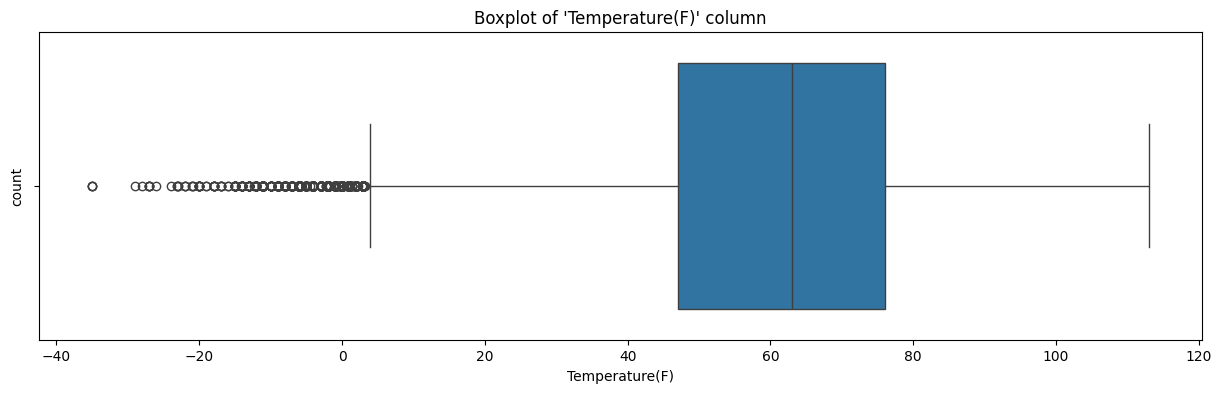

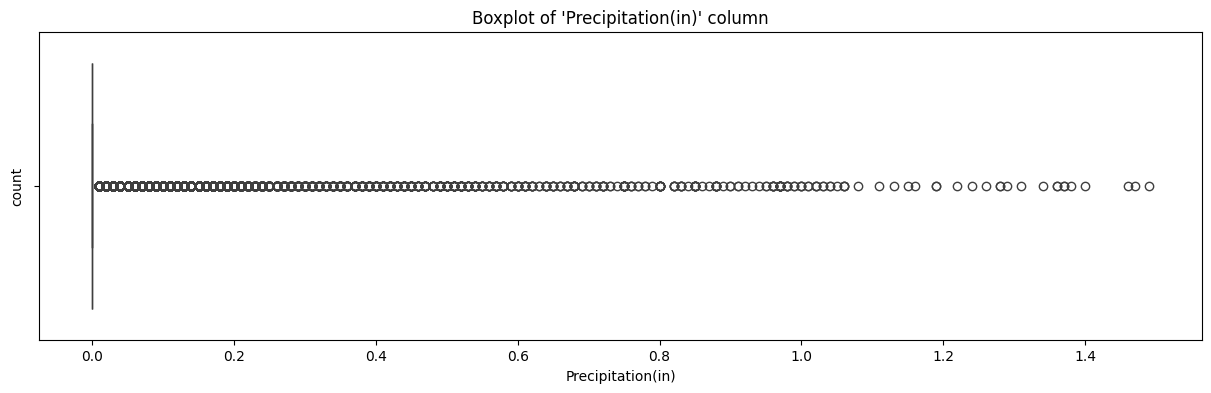

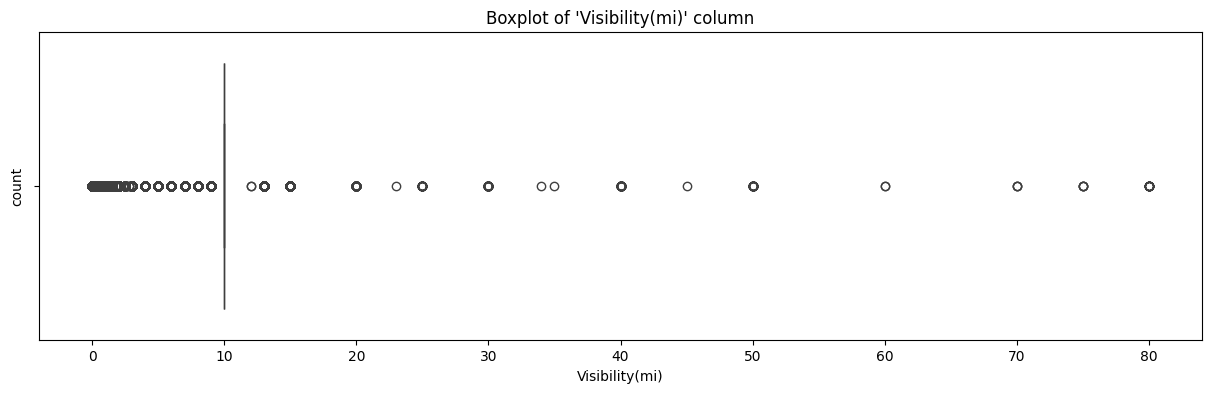

In [ ]:
box_plot(df_updated)

# **Plot correlation**

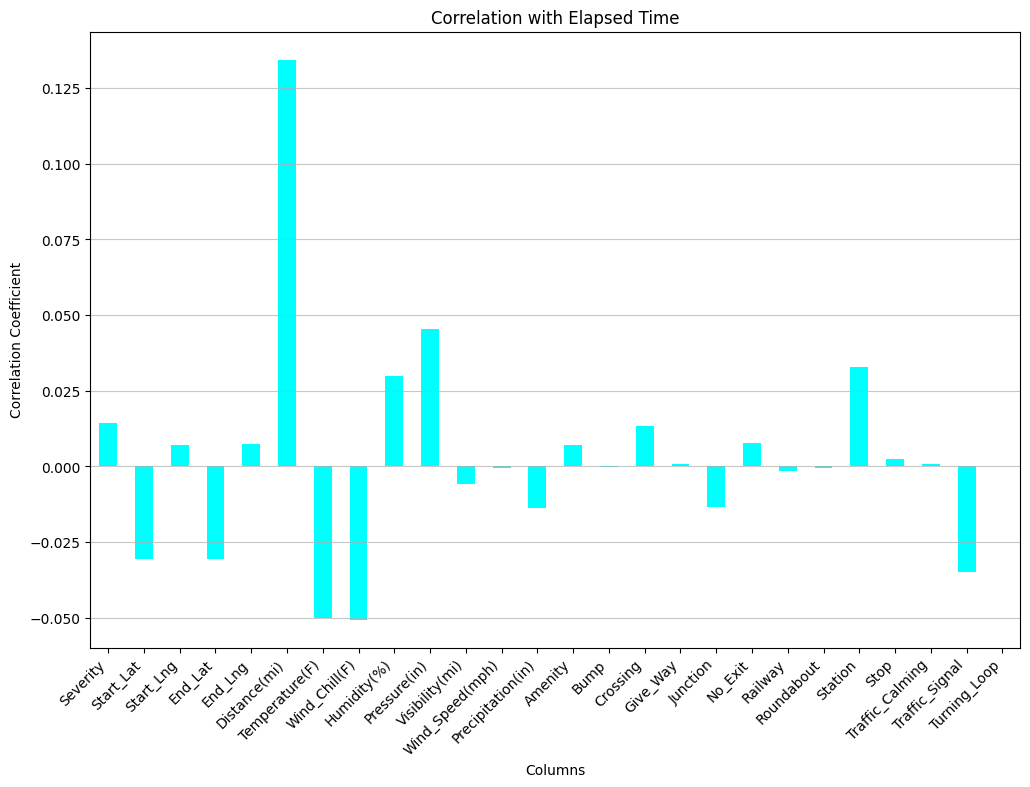

In [ ]:
correlation_with_Elapsed_Time = df_updated.corrwith(df_updated['Elapsed_Time'], numeric_only=True)

#filter out 'Elapsed_Time' from correlations
correlation_with_Elapsed_Time = correlation_with_Elapsed_Time.drop('Elapsed_Time')

plot.figure(figsize=(12, 8))
correlation_with_Elapsed_Time.plot(kind='bar', color='cyan')
plot.title('Correlation with Elapsed Time')
plot.xlabel('Columns')
plot.ylabel('Correlation Coefficient')
plot.xticks(rotation=45, ha='right')
plot.grid(axis='y', linestyle='-', alpha=0.7)
plot.show()

There is a weak positive correlation between elapsed time and temperature. This means that as time goes by, the temperature tends to increase slightly.
There is a weak negative correlation between elapsed time and humidity. This means that as time goes by, the humidity tends to decrease slightly.
There is very weak correlation between elapsed time and all other weather metrics listed including wind chill, pressure, visibility, wind speed, precipitation.

# **Accident count, Delay based on Day of Week**

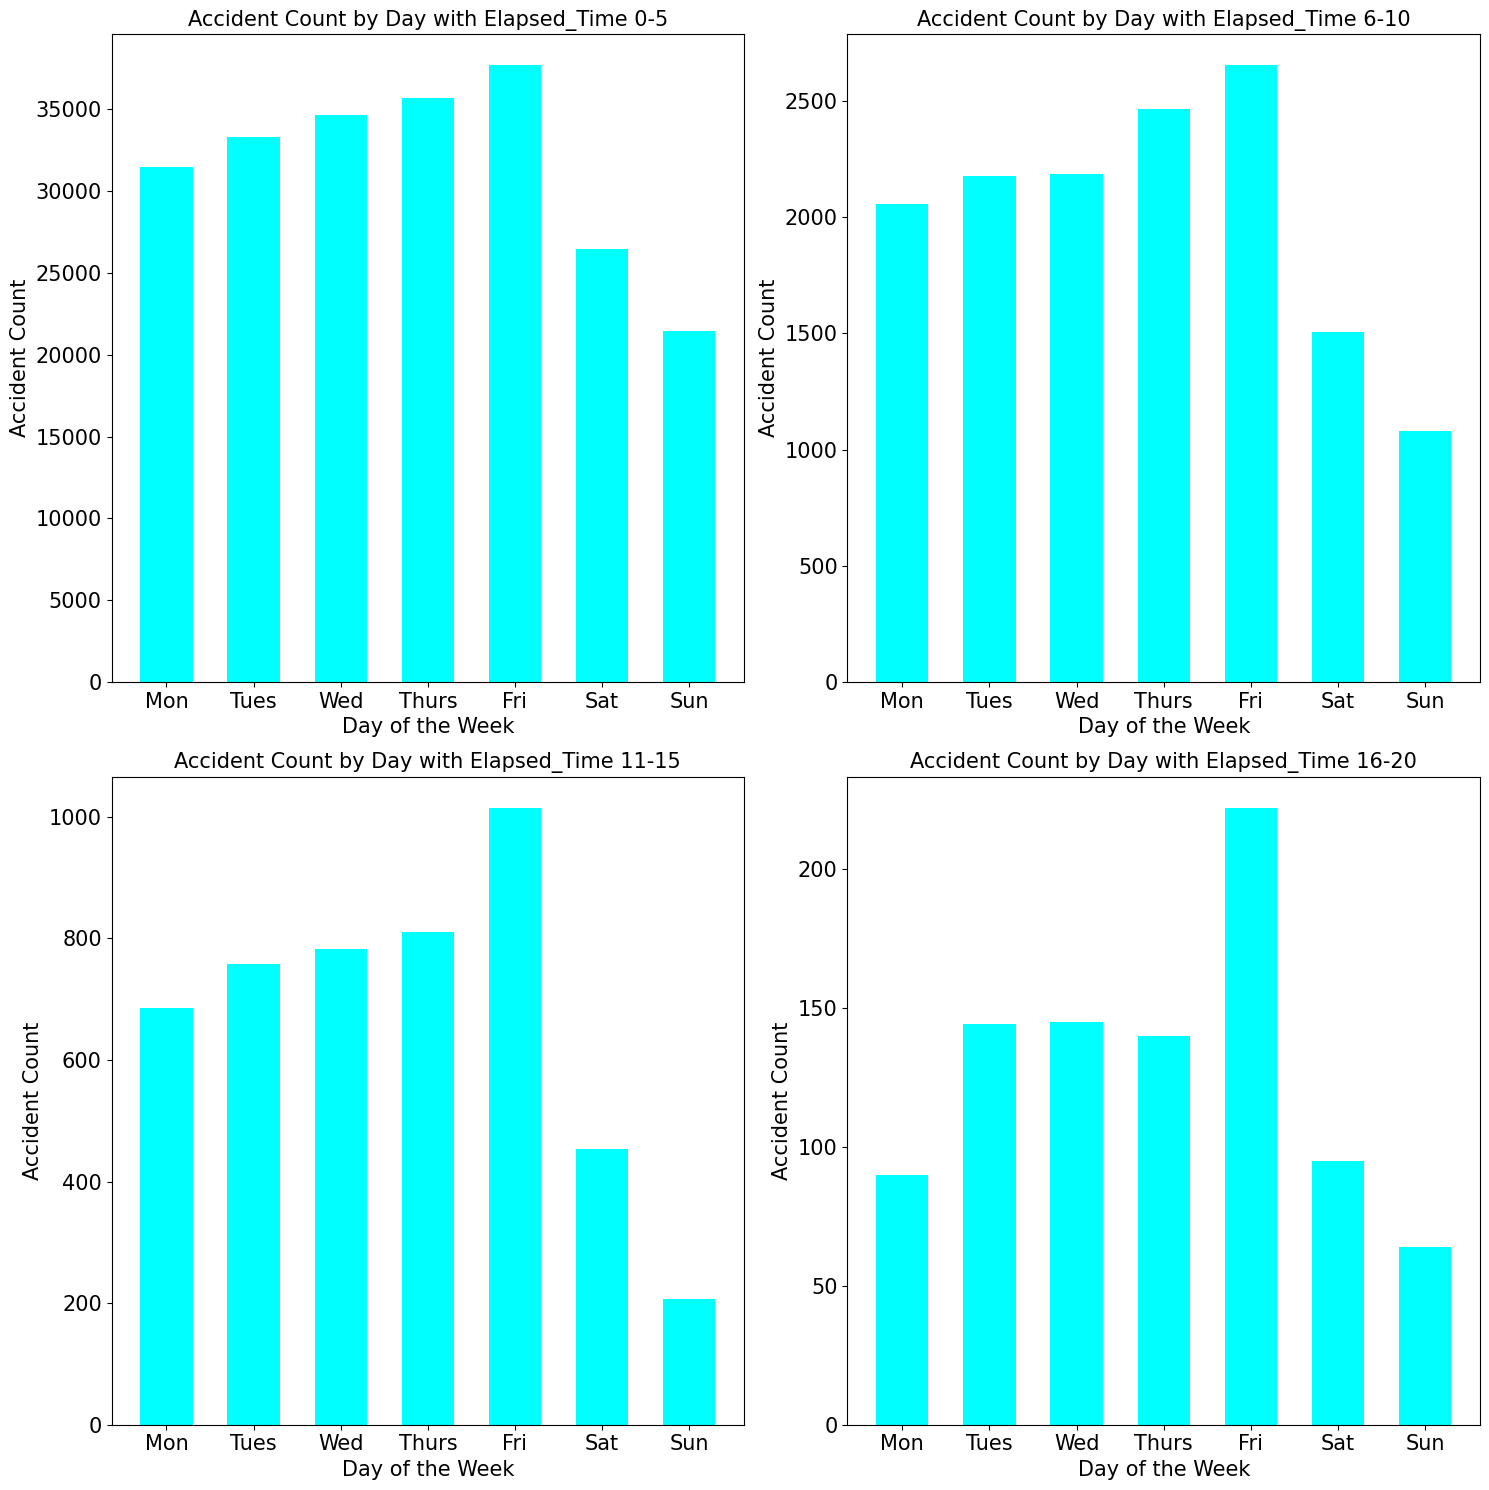

In [ ]:

df_updated['time'] = pd.to_datetime(df_updated['Start_Time'])

#get day of the week
df_updated['DayOfWeek'] = df_updated['time'].dt.dayofweek

#bins for 'Elapsed_Time' intervals
time_bins = [0, 5, 10, 15, 20]  # Define your own interval boundaries

#time_bins = [0, 0.5, 0.75, 1, 2,5,10,15,20]  # Define your own interval boundaries

#labels for the bins
time_labels = ['0-5', '6-10', '11-15', '16-20']

#bin 'Elapsed_Time' into intervals
df_updated['Elapsed_Time_Category'] = pd.cut(df_updated['Elapsed_Time'], bins=time_bins, labels=time_labels, right=False)

num_bins = len(time_labels)
num_rows = (num_bins + 1) // 2  #calculate number of rows
fig, axs = plot.subplots(num_rows, 2, figsize=(15, 15))
for i, time_label in enumerate(time_labels):
    row_idx = i // 2
    col_idx = i % 2
    ax = axs[row_idx, col_idx]
    ax.hist(df_updated.loc[df_updated["Elapsed_Time_Category"] == time_label]['DayOfWeek'], bins=np.arange(8)-0.5, align='mid', rwidth=0.6, color = 'cyan')
    ax.set_title("Accident Count by Day with Elapsed_Time " + time_label, fontsize=15)
    ax.set_xlabel("Day of the Week", fontsize=15)
    ax.set_ylabel("Accident Count", fontsize=15)
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], fontsize=15)
    ax.tick_params(axis='y', labelsize=15)

plot.tight_layout()
plot.show()

Fridays tend to have the highest overall accident counts across all time windows.
There are generally more accidents during the day than at night across all time windows. This may be due to factors such as increased traffic volume or visibility.
It appears that the latest time window (16-20) has the most accidents on weekdays (Monday-Thursday) compared to the other time windows.


# **10 of The Main Weather Conditions for Accidents with Delay**

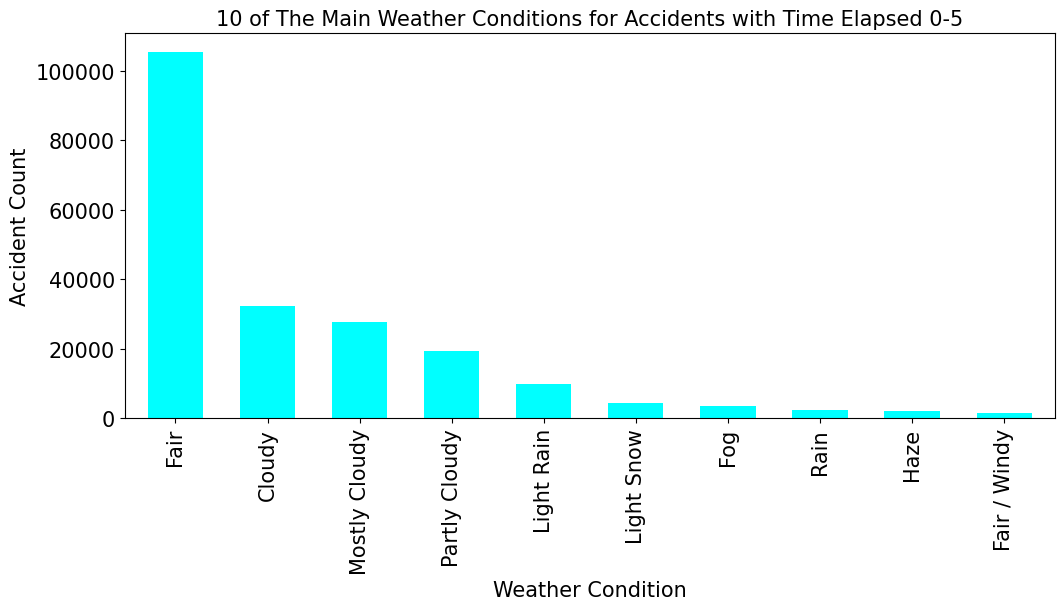

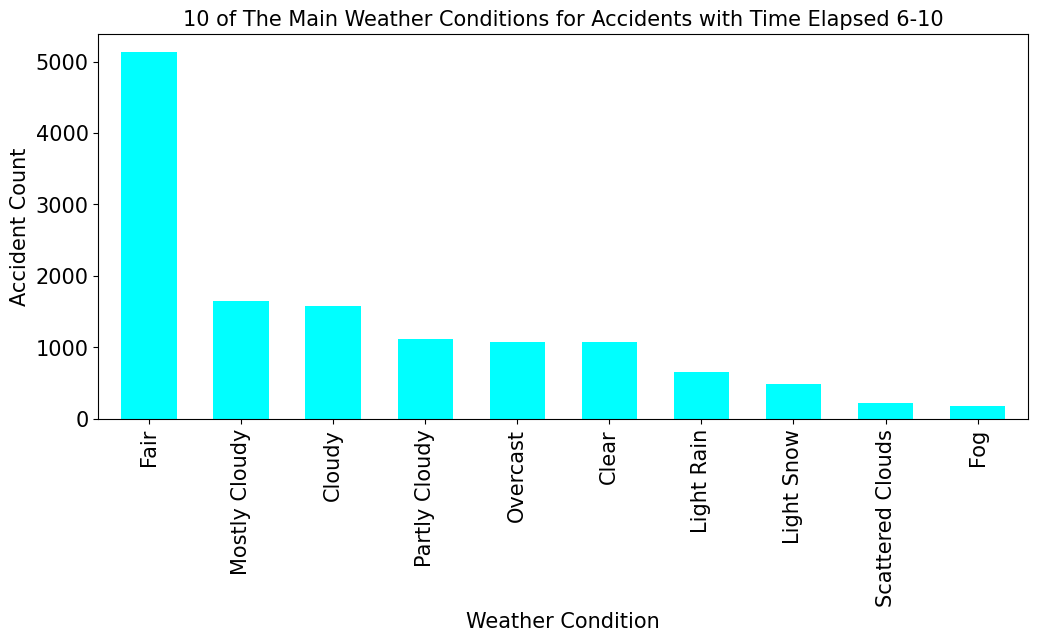

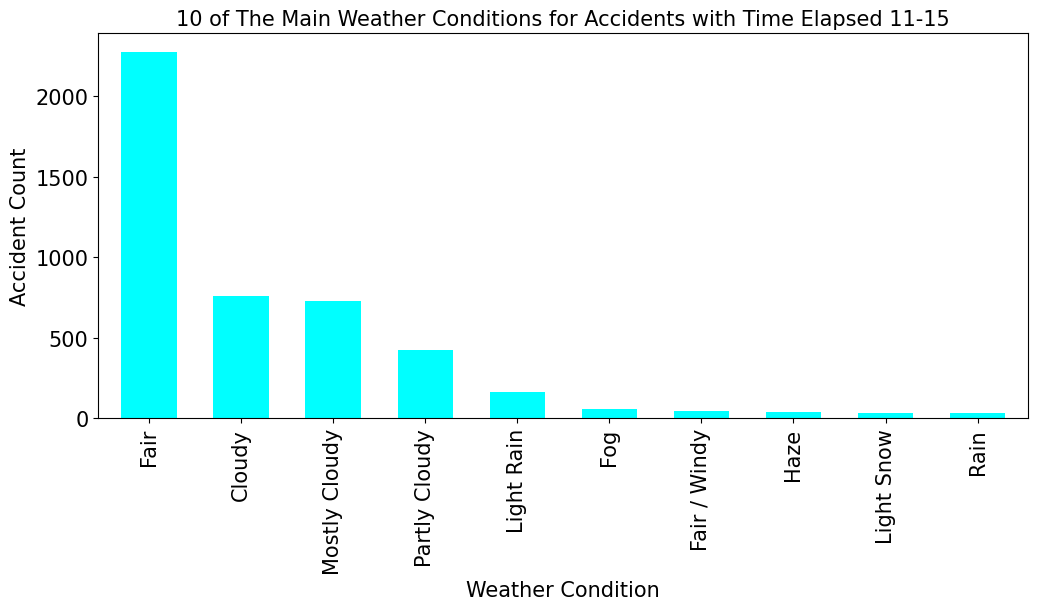

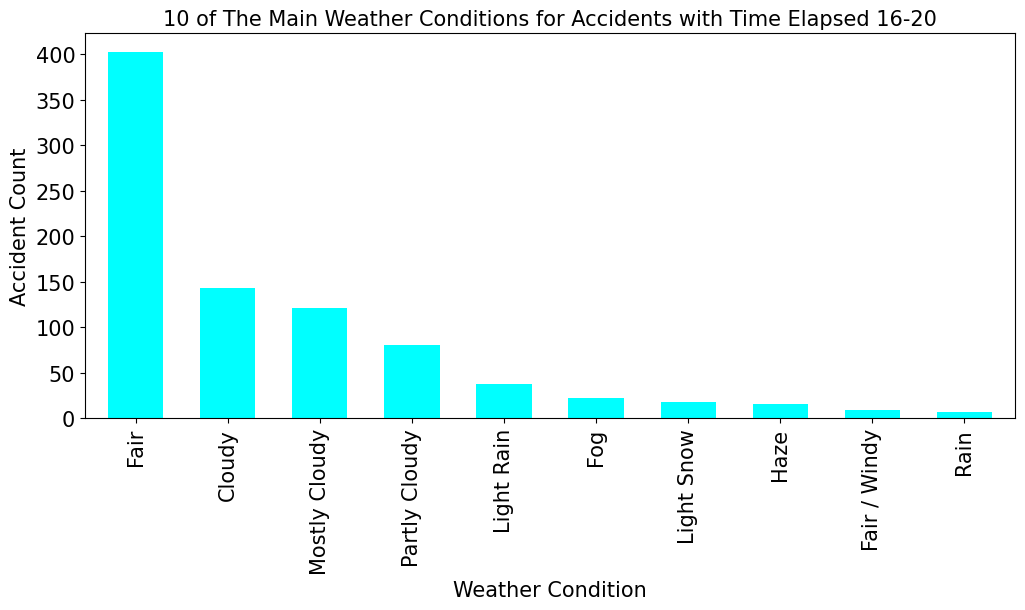

In [ ]:
#histogram for each time interval and weather condition
for time_label in time_labels:
    plot.subplots(figsize=(12, 5))
    df_updated.loc[df_updated["Elapsed_Time_Category"] == time_label]['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.6, color='cyan', align='center', linewidth=1)
    plot.xlabel('Weather Condition', fontsize=15)
    plot.ylabel('Accident Count', fontsize=15)
    plot.title(f'10 of The Main Weather Conditions for Accidents with Time Elapsed {time_label}', fontsize=15)
    plot.xticks(fontsize=15)
    plot.yticks(fontsize=15)
    plot.show()

Most accidents occur in Fair weather followed by Cloudy and mostly cloudy.


# **Distribution of Accidents for Delay Category**

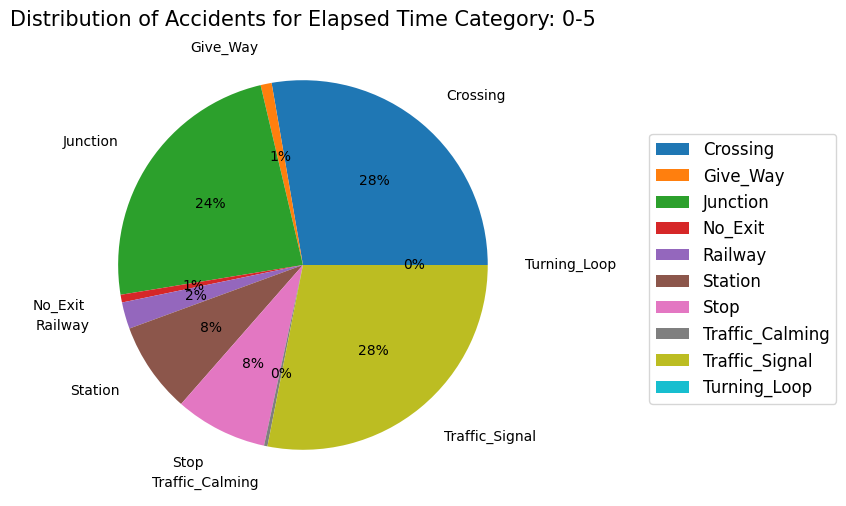

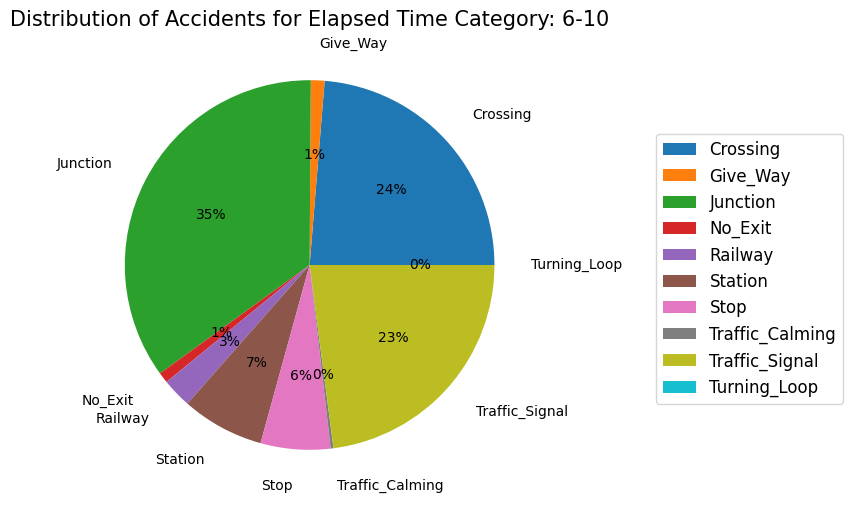

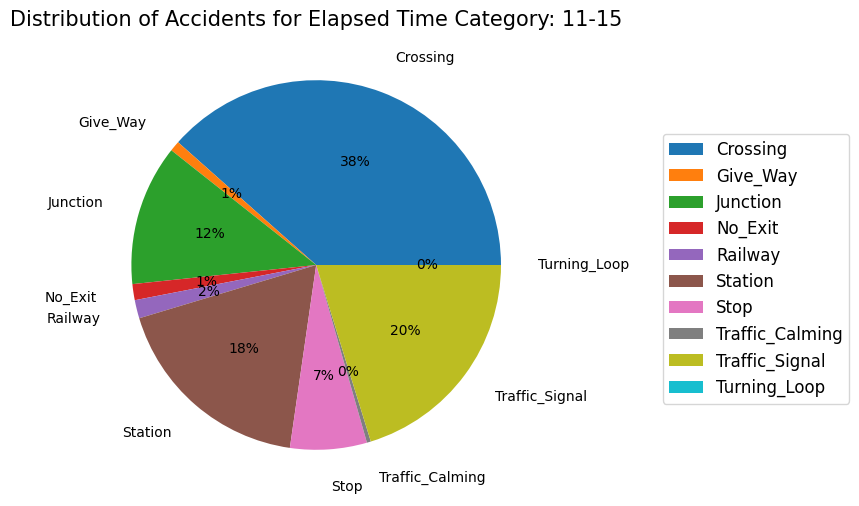

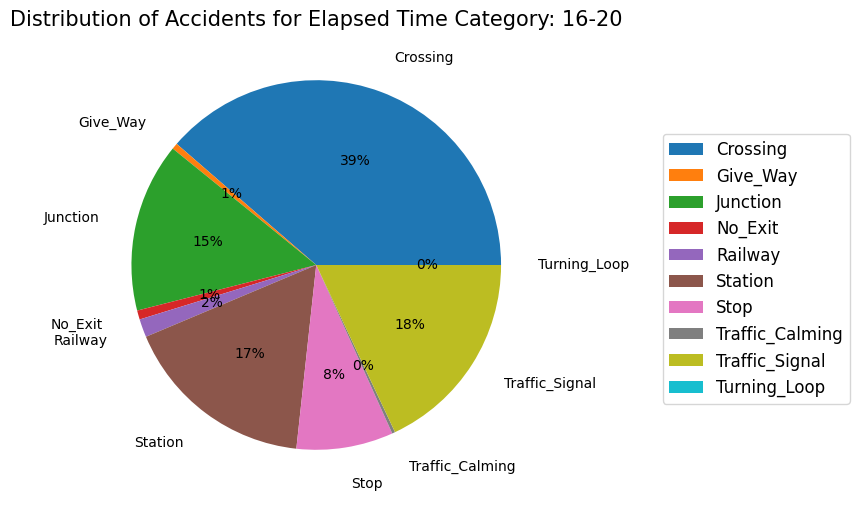

In [ ]:

road_conditions= [ 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']


for time_label in time_labels:
    #create a figure and axis object
    fig, ax = plot.subplots(figsize=(10, 6))

    plot.title(f'Distribution of Accidents for Elapsed Time Category: {time_label}', fontsize=15)

    #cilter data for the current time bucket
    filtered_data = df_updated[df_updated['Elapsed_Time_Category'] == time_label]

    #count the number of accidents for each road condition
    accident_counts = filtered_data[road_conditions].sum()

    #clot a pie chart for the distribution of accidents for the current time bucket
    ax.pie(accident_counts, labels=road_conditions, autopct='%1.0f%%', labeldistance=1.2)

    ax.legend(road_conditions, loc=(1.25, 0.2), fontsize=12)

    plot.show()

For delay time 0-5 hours, most of the accidents occur near a traffic signal, followed by crossing.
For delay time 6-10 hours, most of the accidents occur near a junction, followed by crossing and traffic signal.
For delay time more than 11 hours, most of the accidents occur near a crossing, followed by traffic signal.

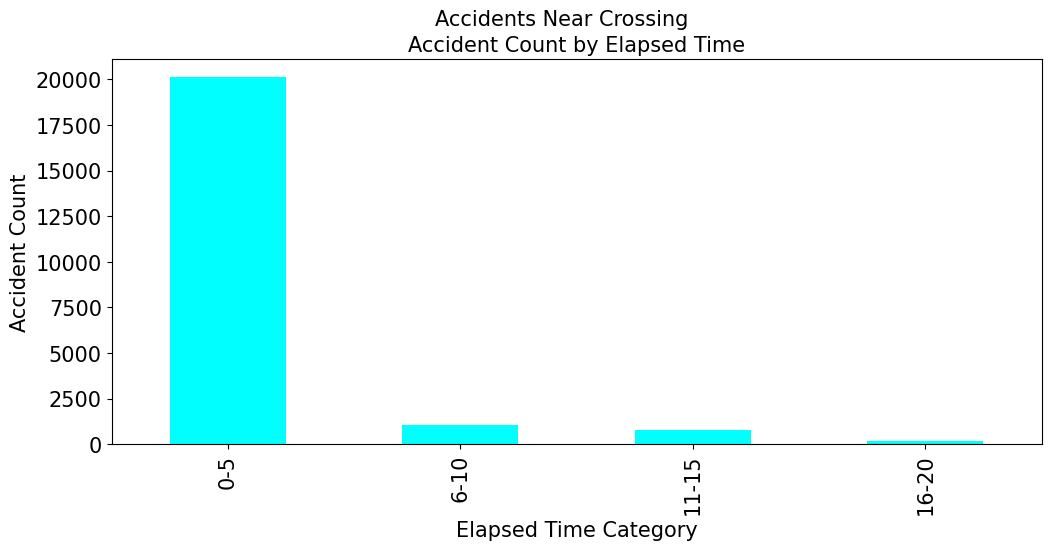

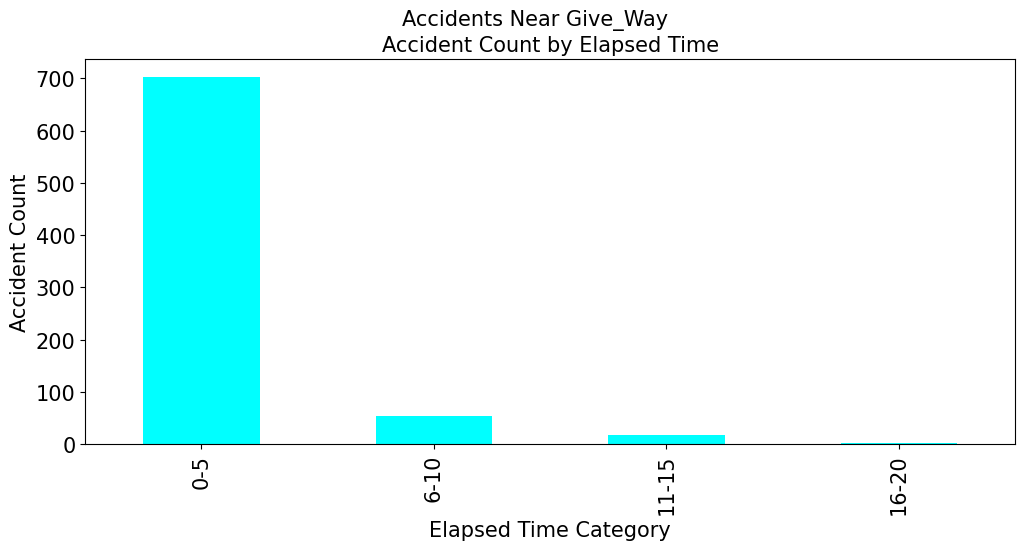

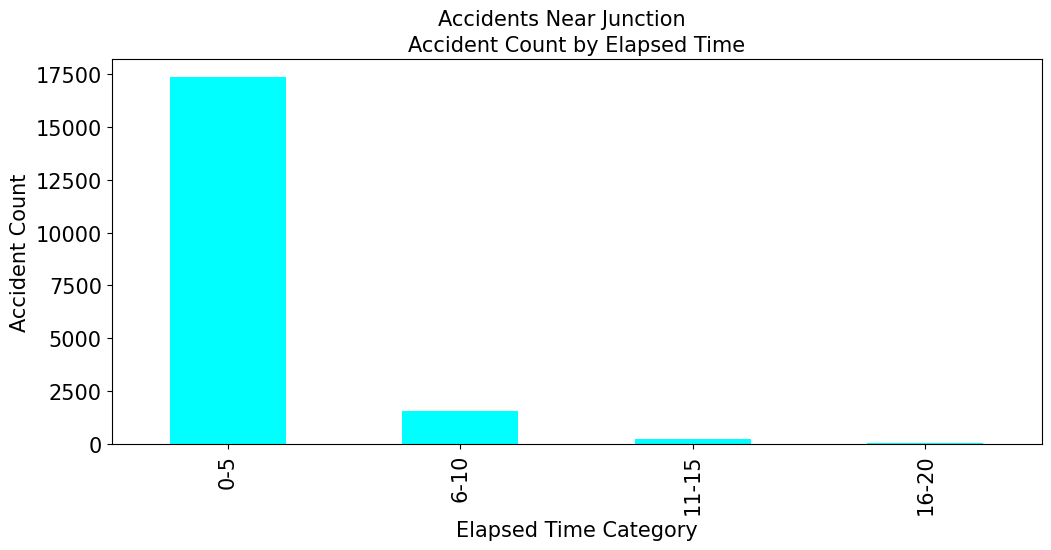

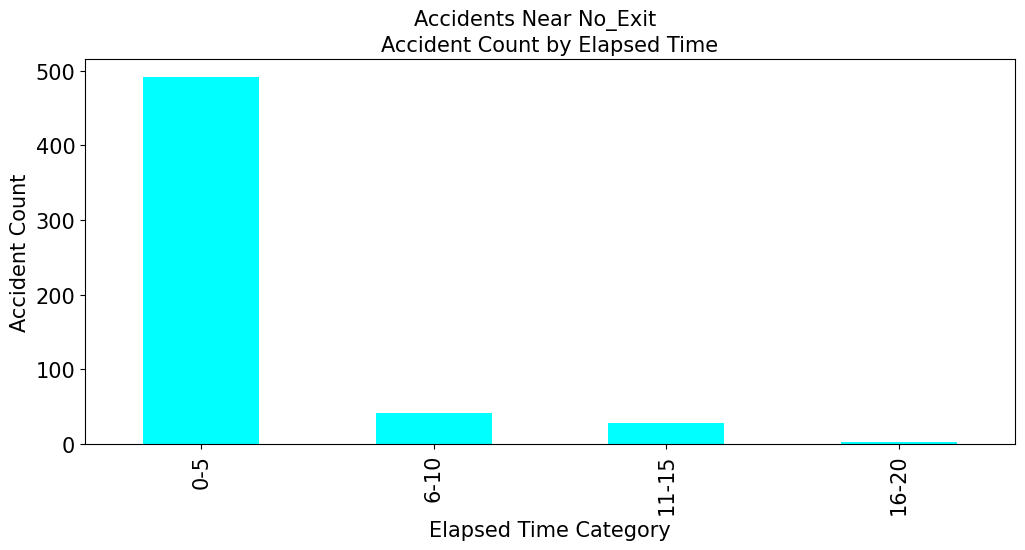

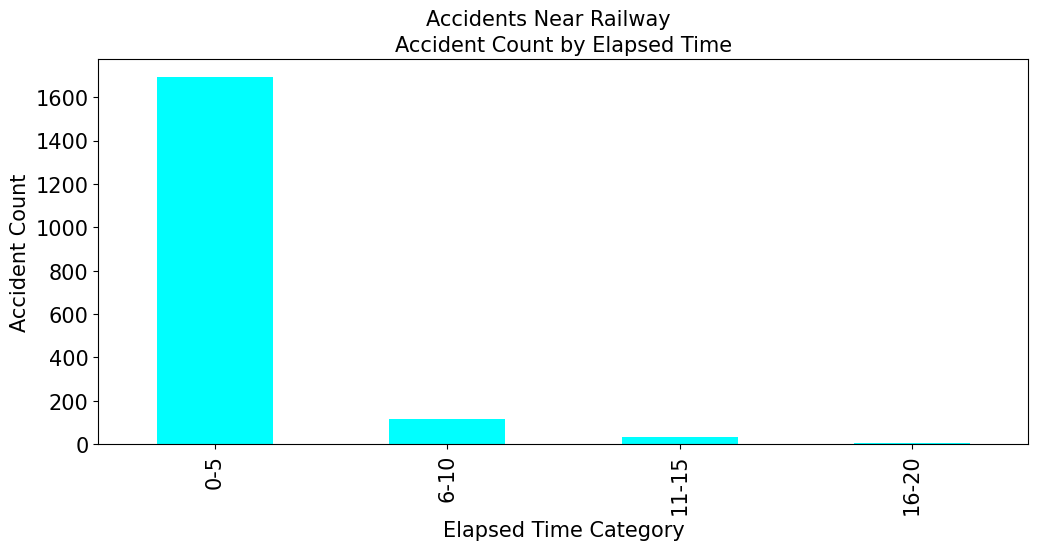

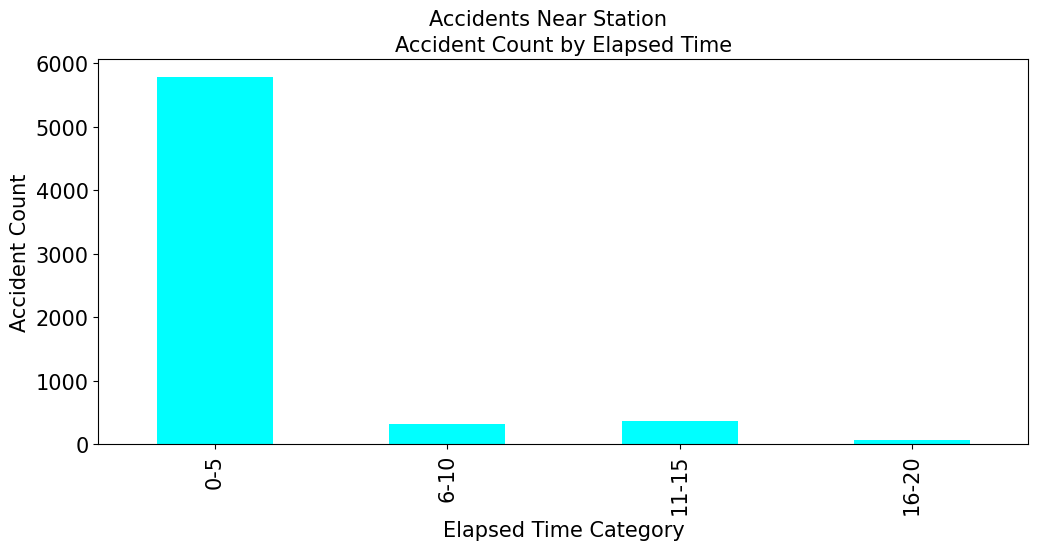

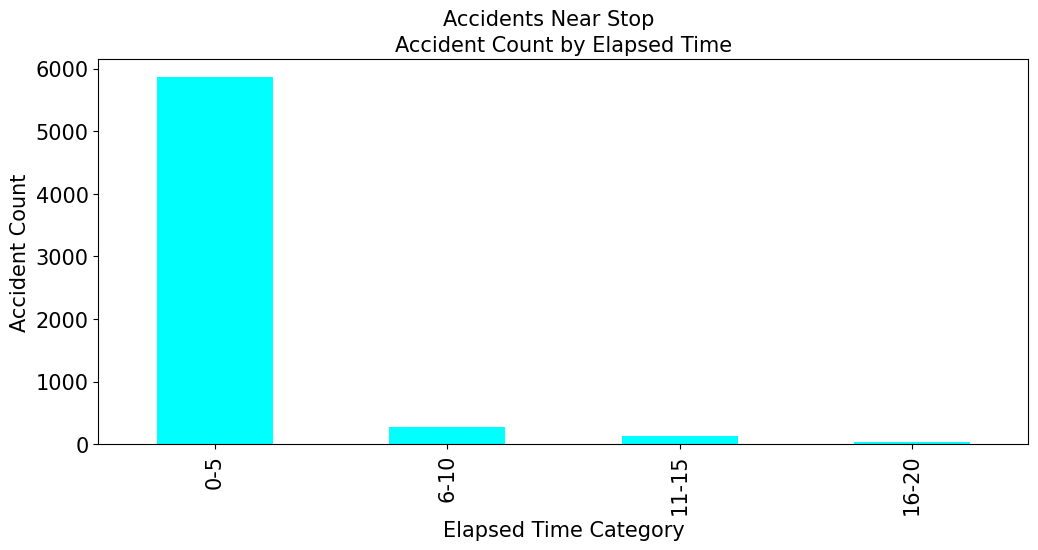

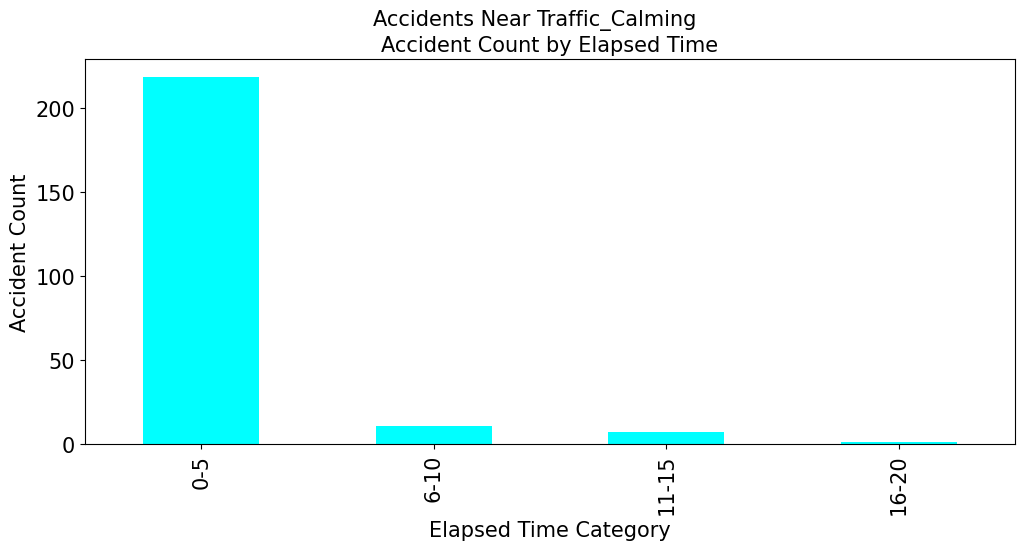

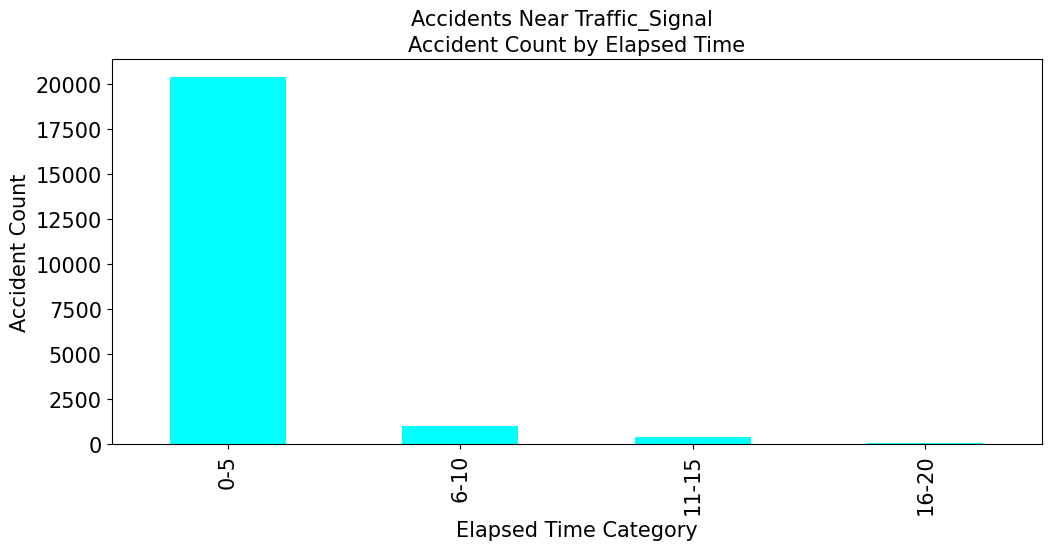

In [ ]:
for s in road_conditions:
    #fot road condition in any record
    if df_updated[s].any():
        plot.subplots(figsize=(12, 5))
        plot.suptitle('Accidents Near ' + s, fontsize=15)

        df_updated.loc[df_updated[s], 'Elapsed_Time_Category'].value_counts().sort_index().plot.bar(width=0.5, color='cyan', align='center', linewidth=0.5)

        plot.ylabel('Accident Count', fontsize=15)
        plot.xlabel('Elapsed Time Category', fontsize=15)
        plot.xticks(fontsize=15)
        plot.yticks(fontsize=15)
        plot.title('Accident Count by Elapsed Time', fontsize=15)


plot.show()

# **Top 5 States for Accidents**

---



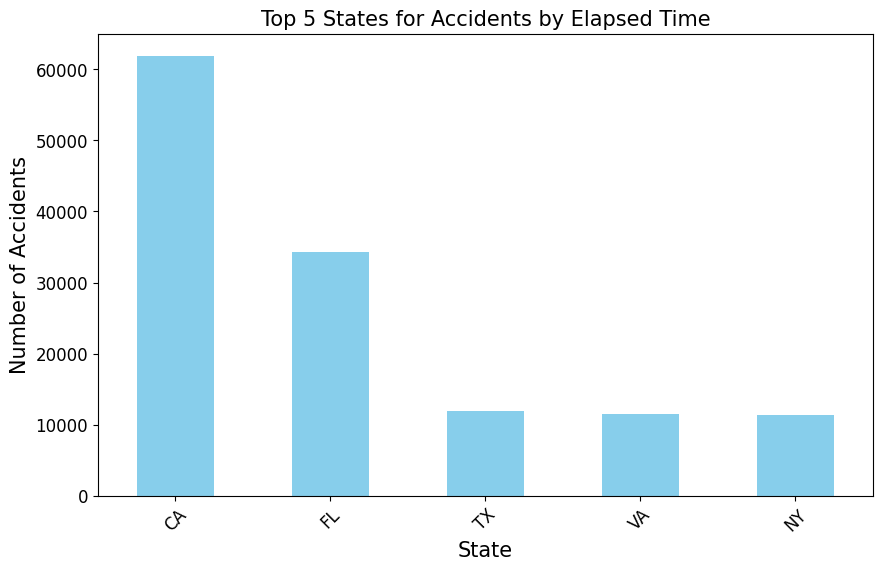

In [ ]:
state_accident_counts = df_updated['State'].value_counts()

#sort the states based on the total number of accidents
sorted_states = state_accident_counts.sort_values(ascending=False)

top_5_states = sorted_states.head(5)

plot.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='skyblue')

plot.xlabel('State', fontsize=15)
plot.ylabel('Number of Accidents', fontsize=15)
plot.title('Top 5 States for Accidents by Elapsed Time', fontsize=15)

plot.xticks(rotation=45, fontsize=12)
plot.yticks(fontsize=12)

plot.show()

# **Top 5 States for Accidents by Elapsed Time**

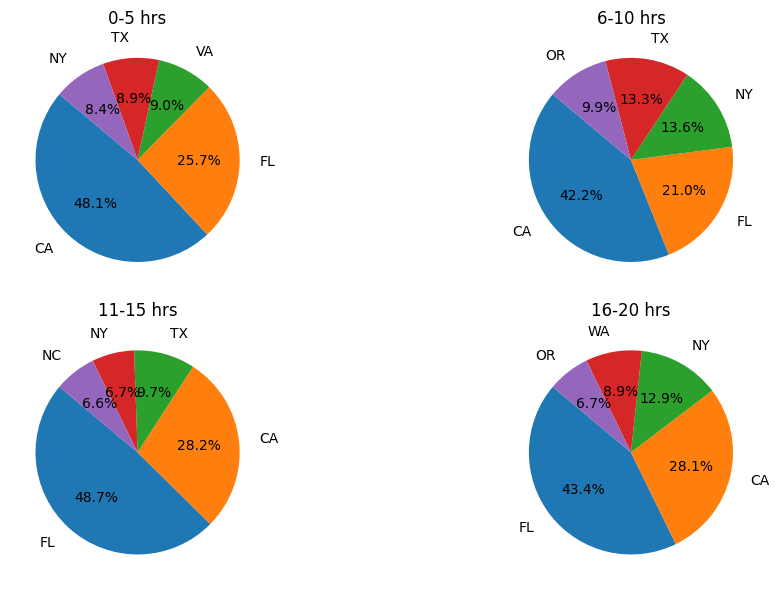

In [ ]:
fig = plot.figure(figsize=(12, 6))


#iterate over each time elapsed category
for i, time_label in enumerate(time_labels):
    #filter the DataFrame for the current time elapsed category and select the 'State' column
    #count the occurrences of each state, select the top 10, and plot them as a pie chart
    df_time_filtered = df_updated.loc[df_updated["Elapsed_Time_Category"] == time_label]
    state_counts = df_time_filtered['State'].value_counts().head(5)
    if not state_counts.empty:
        ax = fig.add_subplot(2, len(time_labels)//2, i+1)

        ax.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, labeldistance=1.2)
        ax.set_title(f'{time_label} hrs', fontsize=12)

plot.tight_layout()

plot.show()

CA has most percentage of accidents where the delay is less that 10 hours.
The accidents where the delay is more than 10 hours occur more in Florida.

# **Accident Count Heatmap by Visibility and Delay**

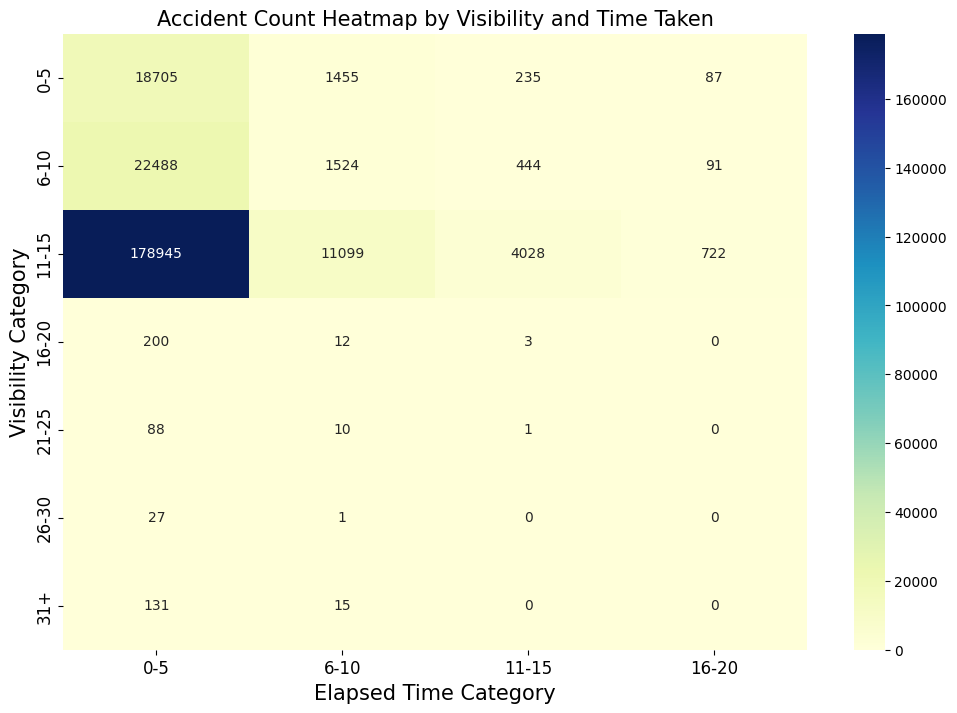

In [ ]:
Visibility_bins = [0, 5, 10, 15, 20, 25, 30, np.inf]
Visibility_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31+']


df_updated['Visibility_Category'] = pd.cut(df_updated['Visibility(mi)'], bins=Visibility_bins, labels=Visibility_labels, right=False)
#group by 'Visibility_Category' and 'Elapsed_Time_Category', and count the accidents
heatmap_data = df_updated.groupby(['Visibility_Category', 'Elapsed_Time_Category']).size().unstack(fill_value=0)

plot.figure(figsize=(12, 8))
sb.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plot.xlabel('Elapsed Time Category', fontsize=15)
plot.ylabel('Visibility Category', fontsize=15)
plot.title('Accident Count Heatmap by Visibility and Time Taken', fontsize=15)
plot.xticks(fontsize=12)
plot.yticks(fontsize=12)
plot.show()

The most accidents occur when visiblity is between 11-15 mi causing delay upto 5 hours.

# **Accident Count by Hour of Day for Delay**

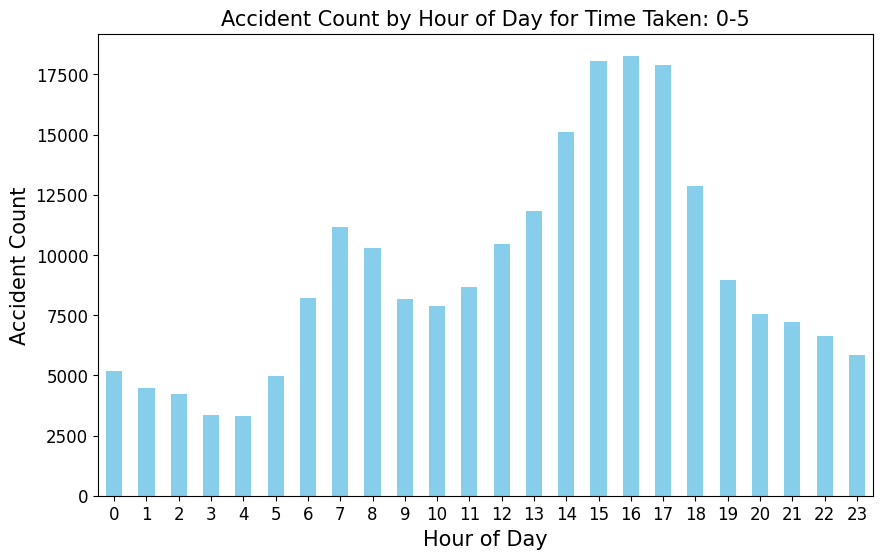

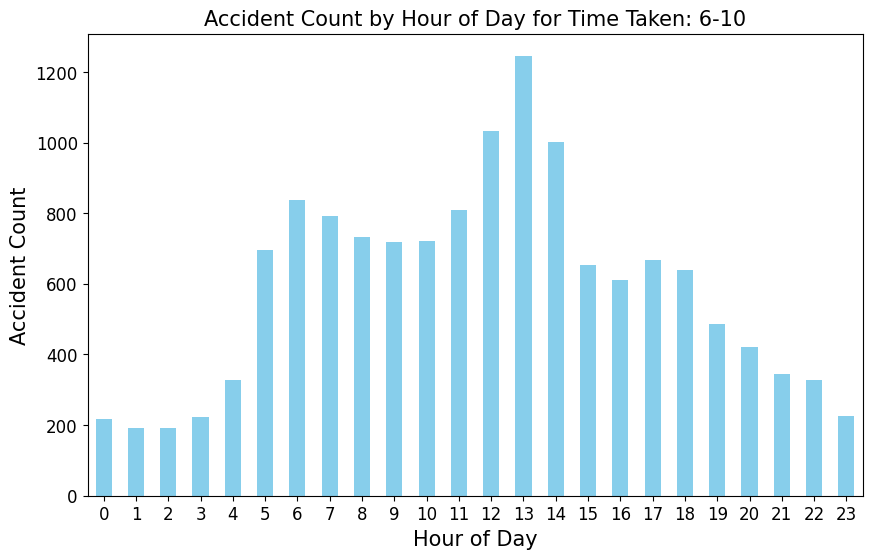

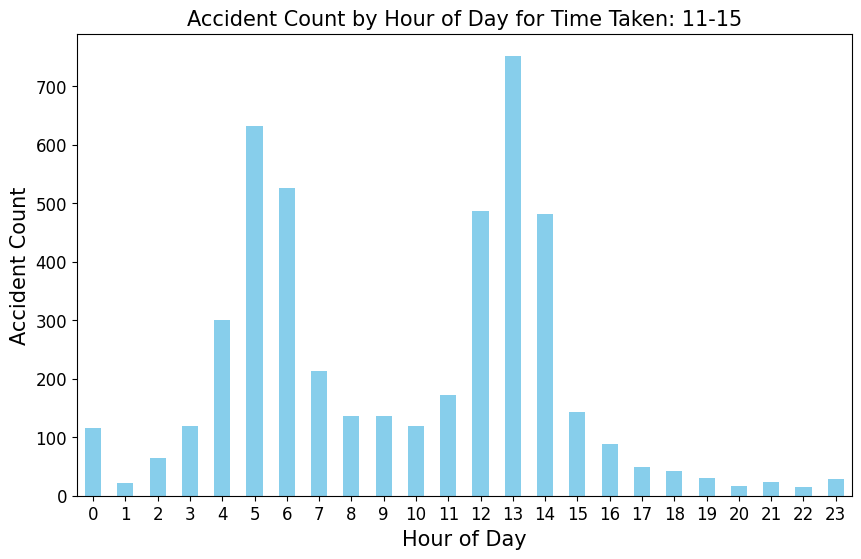

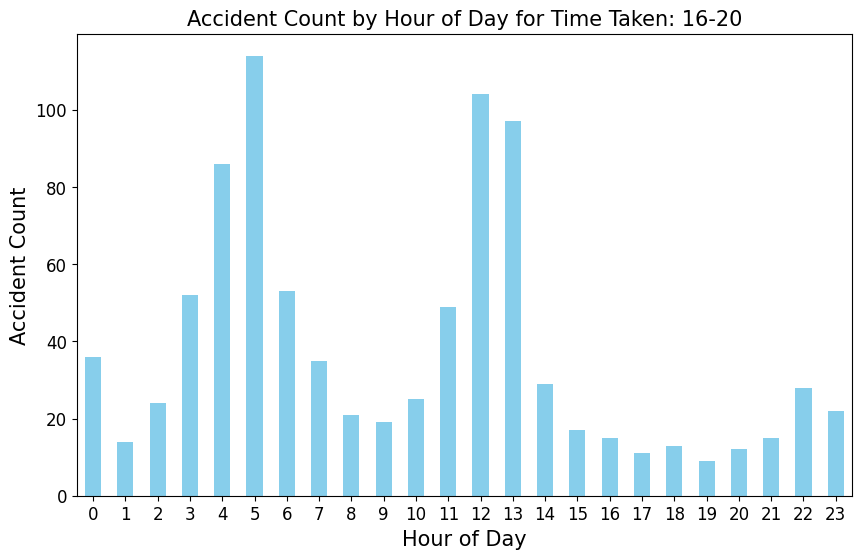

In [ ]:
df_updated['Start_Time'] = pd.to_datetime(df_updated['Start_Time'])
df_updated['HourOfDay'] = df_updated['Start_Time'].dt.hour


for time_label in time_labels:
    #filter the data for the current time taken category
    filtered_data = df_updated[df_updated['Elapsed_Time_Category'] == time_label]

    grouped_data = filtered_data.groupby('HourOfDay').size()

    plot.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar', color='skyblue')
    plot.xlabel('Hour of Day', fontsize=15)
    plot.ylabel('Accident Count', fontsize=15)
    plot.title(f'Accident Count by Hour of Day for Time Taken: {time_label}', fontsize=15)
    plot.xticks(rotation=0, fontsize=12)
    plot.yticks(fontsize=12)
    plot.show()

most accidents occur between 3-5 in the evening that cause delay upto 5 hours.
The accidents that cause delay of more than 20 hours mostly occur between 4 to 5 am.